In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import brenth

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
pi=4*np.arctan(1.)

In [2]:
def U(x):
    return x**2+0.02*(np.cos(167*x)+np.sin(73*x))

def dU(x):
    return 2*x+0.02*(-167*np.sin(167*x)+73*np.cos(73*x))

def T(x):
    return 1.-(dU(x)/g1)**2

def dT(x):
    return -2*dU(x)*ddU(x)/g1**2

def ddU(x):
    return 2.+0.02*(-167**2*np.cos(167*x)-73**2*np.sin(73*x))

def Ueff(x):
    return U(x)+T(x)/g2

def dUeff(x):
    return dU(x)*(1.-2*ddU(x)/(g2*g1**2))

def ddUeff(x):
    return ddU(x)*(1.-2*ddU(x)/(g2*g1**2))

In [3]:
def LL(x):
    return 2*x + 0.02*(167+73)
    
def UL(x):
    return 2*x - 0.02*(167+73)

def f1(x):
    return dU(x)-g1
def f2(x):
    return dU(x)+g1

def integrand(x):
    return dUeff(x)/T(x)

In [4]:
def root(F, x1, x2, div, it):
    X=np.linspace(x1,x2, div)
    roots=np.array([])
    for i in range(div-1):
        if F(X[i])*F(X[i+1])<=0:
            p1=X[i]
            p2=X[i+1]
            r=brenth(F, p1, p2, maxiter=it)
            roots=np.append(roots, r)
    return roots

In [5]:
def integral2(F, X):
    l=len(X)
    Func=np.zeros(l)
    id0=int(0.5*l)
    xmin=X[id0]
    Func[id0]=0
    for i in range(1,l):
        if i<=id0:
            x0 = X[id0-i+1]
            x1 = X[id0-i]
            Func[id0-i]=integrate.quad(F, x0, x1)[0]
            Func[id0-i]=Func[id0-i]+Func[id0-i+1]
        else:
            x0 = X[i-1]
            x1 = X[i]
            Func[i]=integrate.quad(F, x0, x1)[0]
            Func[i]=Func[i]+Func[i-1]
    return Func

In [6]:
def evol(x, h):
    e=np.random.normal(0, 1)
    y=x-h*dU(x)/g1+np.sqrt(2*T(x)*h/(g1*g2))*e
    return y

## G1 critical

In [7]:
g1 = 0.5 #finding critic value for g1
dg1 = 1.

for i in range(50):    
    a1 = root(f1, 0.5*LL( 0.5*g1), 0.5*UL( 0.5*g1), 5000, 100)
    a2 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 100)
    positive = np.concatenate([a1[a1>0], a2[a2>0]])
    negative = np.concatenate([a1[a1<0], a2[a2<0]])
    xmin = max(0.99*negative)
    xmax = min(0.99*positive)
    x=np.linspace(xmin, xmax, 1000)
    v1 = max(dU(x))
    v2 = min(dU(x))
    
    if v1 <= g1 and v2 >=-g1:
        g1 = g1 - dg1
    if v1 > g1 or v2 < -g1:
        g1 = g1 + dg1
        dg1 = dg1/2.
print (g1, dg1)
g1c = g1

1.49072265625 0.000244140625


## G1 minimum

In [8]:
g1 = g1c  #finding minimum value of interest for g1
dg1 = 2
for i in range(50):    
    a1 = root(f1, 0.5*LL( 0.5*g1), 0.5*UL( 0.5*g1), 5000, 100)
    a2 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 100)
    
    if min(a1)>0 and max(a2)<0:
        g1 = g1 - dg1
    if min(a1)<0 or  max(a2)>0:
        g1 = g1 + dg1
        dg1 = dg1/2.
print (g1, dg1)
g1min = g1

4.649166107177734 4.76837158203125e-07


## Average diffusion 

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


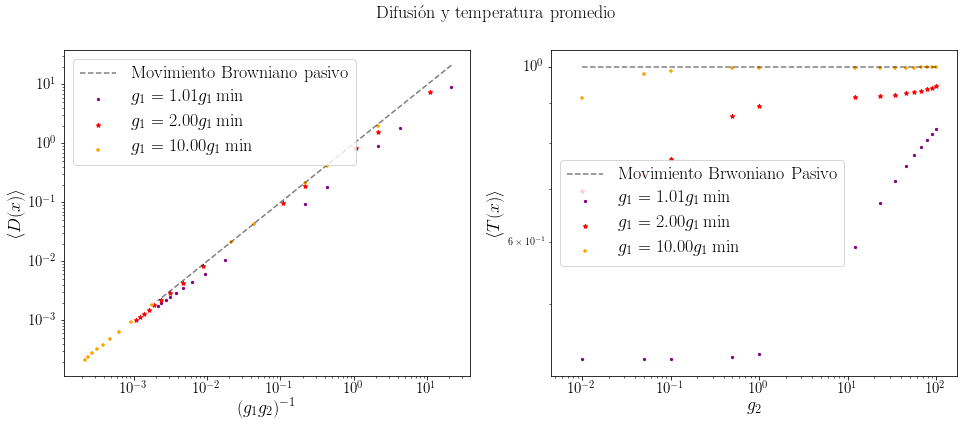

In [14]:
G1 = np.array([1.01, 2.0, 10.0])
color = ['purple', 'red', 'orange']
marker = ['.', '*', '+']
plt.figure(figsize=(16,6))
for i in range(len(G1)):
    g1=G1[i]*g1min
    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    x = np.linspace(0.99*xmin,0.99*xmax, 10000)
    r = root(dU, xmin, xmax, 50000, 500)
    x = np.concatenate([r,x])
    x = np.sort(x)
    g2= 1e-7
    g2c = np.concatenate((np.array([1e-2, 5e-2, 1e-1, 5e-1]), np.linspace(1,100, 10)))

    average1=np.array([])
    average2=np.array([])
    for j in range(len(g2c)):
        g2=g2c[j]    
        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)
        Aux1=T(x)*prob/Z/g1/g2
        Aux2=T(x)*prob/Z
        av1 = np.trapz(Aux1, x)
        average1 = np.append(average1, av1)
        av2 = np.trapz(Aux2, x)
        average2 = np.append(average2, av2)
        
    plt.subplot(1,2,1)
    plt.scatter(1./(g1*g2c), average1, s=20, label=r'$g_1 =%.2f g_1\min$'%G1[i], c=color[i], marker=marker[i], alpha=1)
    if i==0: plt.plot(1./(g1*g2c), 1./(g1*g2c), 'k--', label=r'Movimiento Browniano pasivo', alpha=0.5)
    plt.xlabel(r'$ (g_1g_2)^{-1} $', fontsize=18)
    plt.ylabel(r'$\left< D(x) \right>$', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xscale("log", nonposx='clip')
    plt.yscale("log", nonposy='clip')
    plt.legend(frameon=1, loc='best', fontsize=18)
    plt.subplot(1,2,2)
    plt.scatter(g2c, average2, s=20, label=r'$g_1 =%.2f g_1\min$'%G1[i], c=color[i], marker=marker[i], alpha=1)
    if i==0: plt.plot([min(g2c), max(g2c)], [1,1], 'k--', label=r'Movimiento Brwoniano Pasivo', alpha=0.5)
    plt.xlabel(r'$ g_2 $', fontsize=18)
    plt.ylabel(r'$\left< T(x) \right>$', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xscale("log", nonposx='clip')
    plt.yscale("log", nonposy='clip')
    plt.legend(frameon=1, loc='best', fontsize=18)

plt.suptitle(r'Difusi\'on y temperatura promedio', fontsize=18)
plt.savefig('DTZ.png', bbox_inches='tight')
plt.show()
plt.close()

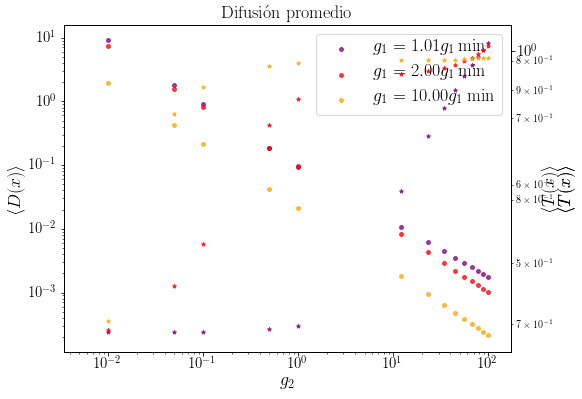

In [46]:
G1 = np.array([1.01, 2.0, 10.0])
color = ['purple', 'red', 'orange']
marker = ['.', '*', '+']
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)
for i in range(len(G1)):
    g1=G1[i]*g1min
    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    x = np.linspace(0.99*xmin,0.99*xmax, 10000)
    r = root(dU, xmin, xmax, 50000, 500)
    x = np.concatenate([r,x])
    x = np.sort(x)
    g2= 1e-7
    g2c = np.concatenate((np.array([1e-2, 5e-2, 1e-1, 5e-1]), np.linspace(1,100, 10)))

    average1=np.array([])
    average2=np.array([])
    for j in range(len(g2c)):
        g2=g2c[j]    
        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)
        Aux1=T(x)*prob/Z/g1/g2
        Aux2=T(x)*prob/Z
        av1 = np.trapz(Aux1, x)
        average1 = np.append(average1, av1)
        av2 = np.trapz(Aux2, x)
        average2 = np.append(average2, av2)
    ax1.scatter(g2c, average1, s=15, label=r'$g_1 =%.2f g_1\min$'%G1[i], c=color[i], alpha=0.75)
    ax1.set_xlabel(r'$g_2$', fontsize=18)
    ax1.set_ylabel(r'$\left<D(x) \right>$', fontsize=18)
    ax1.tick_params('y')
    ax1.set_yscale('log', nonposx='clip')
    ax1.set_xscale('log', nonposy='clip')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax1.legend(frameon=1, loc='best', fontsize=18)

    ax2 = ax1.twinx()
    ax2.scatter(g2c, average2, s=15, label=r'$g_1 =%.2f g_1\min$'%G1[i], c=color[i], marker='*', alpha=0.75)
    ax2.set_ylabel(r'$\left<T(x) \right>$', fontsize=18)
    ax2.tick_params('y')
    ax2.set_yscale('log', nonposy='clip')
    #ax2.set_xscale('log', nonposy='clip')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.title(r'Difusi\'on promedio', fontsize=18)
plt.savefig('DZ.png', bbox_inches='tight')
plt.show()
plt.close()

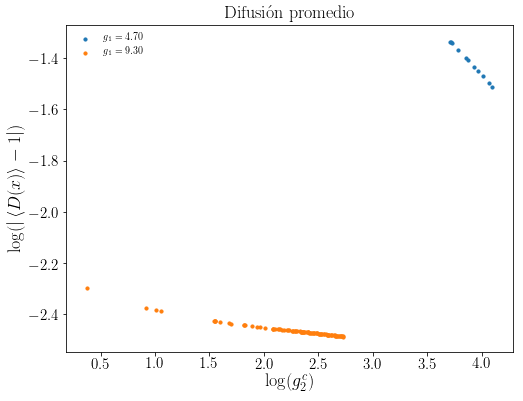

In [27]:
G1 = np.array([1.01, 2.0])
plt.figure(figsize=(8, 6))
for i in range(len(G1)):
    g1=G1[i]*g1min
    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    x = np.linspace(0.99*xmin,0.99*xmax, 10000)
    r = root(dU, xmin, xmax, 50000, 500)
    x = np.concatenate([r,x])
    x = np.sort(x)
    g2= 1e-7
    D = ddU(r)
    r = r[ D > 0] 
    D = D[ D > 0]
    sort = np.argsort(D)
    r = r[sort]
    g2c = np.array([])
    for idx in range(len(r)):
        value = -1
        counter = 0
        dg2 = 1e-3
        while value < 0 :
            g2 = g2 + dg2
            value = ddUeff(r[idx])
            counter = counter + 1
        g2c = np.append(g2c, g2)

    average=np.array([])
    for j in range(len(g2c)):
        g2=g2c[j]    
        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)
        Aux=T(x)*prob/Z
        av = np.trapz(Aux, x)
        average = np.append(average, av)
    
    plt.scatter(g2c, np.abs(average-1) , s=10, label=r'$g_1 =%.2f $'%g1)
    plt.xlabel(r'$ g_2^c $', fontsize=18)
    plt.ylabel(r'$|\left< D(x) \right>-1|$', fontsize=18)
    plt.title(r'Difusi\'on promedio', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.set_xscale("log", nonposx='clip')
    plt.set_yscale("log", nonposy='clip')
    plt.legend(frameon=0, loc='best', fontsize=18)
plt.savefig('DZ.png', bbox_inches='tight')
plt.show()
plt.close()